In [34]:
"""import kagglehub

# Download latest version
path = kagglehub.dataset_download("onurkarasoy/turkish-sms-collection")

print("Path to dataset files:", path)"""

'import kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("onurkarasoy/turkish-sms-collection")\n\nprint("Path to dataset files:", path)'

In [81]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [82]:
df = pd.read_csv(r"dataset\TurkishSmsCollection.csv",sep=";")

In [83]:
df.head(20)

,Message,Group,GroupText
0,125 lira,2,Normal
1,Baskanin aksam toplantısi fenaymis :),2,Normal
2,Bilal yalçnlara ne zaman gidiyoruz?,2,Normal
3,"BiP ile mesajlarimi aninda, daha eglenceli gon...",1,Spam
4,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR...,1,Spam
5,İyi ya dokuz eylül iyidir arş.gör falan kovala ;),2,Normal
6,İyiyim teşekkürler oturuyoruz nazarda arkadaşl...,2,Normal
7,Kapatamıyorun ayarlara girmem lazım :),2,Normal
8,Menüye girsem görünür mü acaba ??,2,Normal
9,Önemli değil hocam iyi akşamlar ;),2,Normal


In [84]:
df["Message"] = df["Message"].str.lower()

In [85]:
df["Message"] = df["Message"].apply(lambda x: re.sub(r'[^a-zA-ZğüşöçİĞÜŞÖÇ0-9 ]', ' ', x))

In [86]:
df["Group"] = df["Group"].replace(1,0)
df["Group"] = df["Group"].replace(2,1)

In [87]:
df.rename(columns={"Group":"Label"},inplace=True)

In [88]:
df.head(20)

,Message,Label,GroupText
0,125 lira,1,Normal
1,baskanin aksam toplant si fenaymis,1,Normal
2,bilal yalçnlara ne zaman gidiyoruz,1,Normal
3,bip ile mesajlarimi aninda daha eglenceli gon...,0,Spam
4,digiturkten firsat size ozel yil sonuna kadar...,0,Spam
5,i yi ya dokuz eylül iyidir arş gör falan koval...,1,Normal
6,i yiyim teşekkürler oturuyoruz nazarda arkadaş...,1,Normal
7,kapatam yorun ayarlara girmem laz m,1,Normal
8,menüye girsem görünür mü acaba,1,Normal
9,önemli değil hocam iyi akşamlar,1,Normal


In [89]:
"""import nltk
nltk.download("stopwords")"""

'import nltk\nnltk.download("stopwords")'

In [90]:
from nltk.corpus import stopwords

In [91]:
turkish_stopwords = set(stopwords.words("turkish"))
df["Message"] = df["Message"].apply(lambda x: " ".join([word for word in x.split() if word not in turkish_stopwords]))

In [92]:
df["Message"][17]

'100 pamuk penye percale saten carsaf carsaf takimlarinda 50 50 indirim 02 agustos son sms iptal 5830 a mc mersis 0273065777400019 madamecoco com'

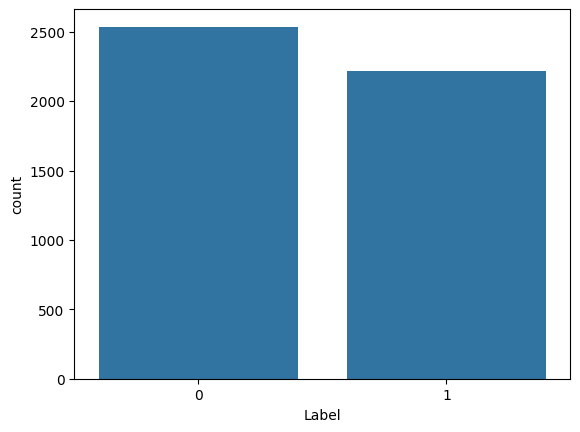

In [93]:
sns.countplot(x=df['Label'])
plt.show()

In [94]:
length_of_the_messages = df["Message"].str.split("\\s+")
print(length_of_the_messages.str.len().max())

59


In [95]:
avg_words_len=round(sum([len(i.split()) for i in df['Message']])/len(df['Message']))
print(avg_words_len)

17


In [96]:
# Finding Total no of unique words in corpus
s = set()
for sent in df['Message']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)

13212


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X , y = np.asanyarray(df["Message"]), np.asanyarray(df["Label"])
new_df = pd.DataFrame({"Text": X,"label": y})

X_train,X_test,y_train,y_test = train_test_split(df["Message"],df["Label"],test_size=0.2,random_state=42)
X_train.shape , y_train.shape , X_test.shape, y_test.shape

((3800,), (3800,), (951,), (951,))

In [99]:
max_len = 50
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"
vocab_size = 500

In [100]:
tokenizer = Tokenizer(num_words=vocab_size,char_level=False,oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'icin': 2,
 'tl': 3,
 'com': 4,
 'sms': 5,
 'm': 6,
 'indirim': 7,
 'http': 8,
 'yazip': 9,
 'ye': 10,
 'ozel': 11,
 'son': 12,
 'e': 13,
 'tr': 14,
 'a': 15,
 'yaz': 16,
 'kampanya': 17,
 'n': 18,
 'mersis': 19,
 'ucretsiz': 20,
 'gonderin': 21,
 'gun': 22,
 'kadar': 23,
 'bonus': 24,
 '50': 25,
 '1': 26,
 'bilgi': 27,
 'ret': 28,
 'almak': 29,
 'firsati': 30,
 'www': 31,
 'istemiyorsaniz': 32,
 'hediye': 33,
 'hemen': 34,
 'i': 35,
 'uzeri': 36,
 'tum': 37,
 '3': 38,
 'sadece': 39,
 'gonder': 40,
 '2': 41,
 'gonderebilirsiniz': 42,
 'iptal': 43,
 '30': 44,
 'bir': 45,
 'ustelik': 46,
 'k': 47,
 'size': 48,
 'goo': 49,
 'gl': 50,
 'ly': 51,
 'bit': 52,
 '10': 53,
 'den': 54,
 'ben': 55,
 '5': 56,
 'varan': 57,
 '31': 58,
 'yeni': 59,
 '90': 60,
 'internet': 61,
 '6': 62,
 'kacirmayin': 63,
 '20': 64,
 '4': 65,
 'no': 66,
 'yok': 67,
 's': 68,
 '100': 69,
 'mi': 70,
 'kargo': 71,
 'taksit': 72,
 'ilk': 73,
 'yazin': 74,
 '9': 75,
 'cikmak': 76,
 'garanti': 77,
 'firsat': 

In [101]:
tot_words = len(word_index)
tot_words

11512

In [102]:
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,padding = padding_type, truncating = trunc_type)

In [103]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (3800, 50)
Shape of testing tensor:  (951, 50)


In [104]:
# Before padding length
print(len(training_sequences[0]), len(training_sequences[1]))
# After padding length
print(len(training_padded[0]), len(training_padded[1]))

3 20
50 50


In [114]:
vocab_size = 500 # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24
#Dense model architecture
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])
# fitting a dense spam detector model
num_epochs = 20
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, y_train, epochs=num_epochs, validation_data=(testing_padded, y_test),callbacks =[early_stop], verbose=2)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_9      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
119/119 - 1s - 9ms/step - accuracy: 0.7913 - loss: 0.5447 - val_accuracy: 0.8970 - val_loss: 0.3509
Epoch 2/20
119/119 - 0s - 2ms/step - accuracy: 0.9292 - loss: 0.2573 - val_accuracy: 0.9327 - val_loss: 0.2071
Epoch 3/20
119/119 - 0s - 1ms/step - accuracy: 0.9513 - loss: 0.1630 - val_accuracy: 0.9527 - val_loss: 0.1443
Epoch 4/20
119/119 - 0s - 1ms/step - accuracy: 0.9668 - loss: 0.1122 - val_accuracy: 0.9695 - val_loss: 0.0974
Epoch 5/20
119/119 - 0s - 2ms/step - accuracy: 0.9784 - loss: 0.0755 - val_accuracy: 0.9758 - val_loss: 0.0706
Epoch 6/20
119/119 - 0s - 2ms/step - accuracy: 0.9861 - loss: 0.0544 - val_accuracy: 0.9800 - val_loss: 0.0543
Epoch 7/20
119/119 - 0s - 1ms/step - accuracy: 0.9892 - loss: 0.0431 - val_accuracy: 0.9800 - val_loss: 0.0462
Epoch 8/20
119/119 - 0s - 1ms/step - accuracy: 0.9895 - loss: 0.0347 - val_accuracy: 0.9842 - val_loss: 0.0402
Epoch 9/20
119/119 - 0s - 1ms/step - accuracy: 0.9908 - loss: 0.0307 - val_accuracy: 0.9863 - val_loss: 0.0365
E